In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from DirtyDF import *
from stainer import *

In [2]:
df = pd.DataFrame([(0, 'Cat'), (1, 'Dog'), (2, 'Rabbit'), (3, 'Cat'), (4, 'Cat'), (5, 'Dog')],
                  columns=('id', 'class'))

In [3]:
df["class"] = df["class"].astype("category")

# Shuffle

In [4]:
stain = ShuffleStainer()

In [5]:
res = DirtyDF(df, seed = 214).add_stainers(stain).add_stainers(stain).run_all_stainers()
res.get_df()

,id,class
2,2,Rabbit
5,5,Dog
4,4,Cat
1,1,Dog
0,0,Cat
3,3,Cat


In [6]:
# Original DF is unmodified
df

,id,class
0,0,Cat
1,1,Dog
2,2,Rabbit
3,3,Cat
4,4,Cat
5,5,Dog


In [7]:
res.get_map_from_history(0)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [8]:
res.get_previous_map()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [9]:
res.get_mapping(axis = 0)

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [10]:
res.get_mapping(axis = 1)

array([[1., 0.],
       [0., 1.]])

In [11]:
new_ddf = DirtyDF(df, seed = 214).add_stainers(stain).run_stainer()
new_ddf.add_stainers(stain).run_stainer().get_df()

,id,class
2,2,Rabbit
5,5,Dog
4,4,Cat
1,1,Dog
0,0,Cat
3,3,Cat


In [12]:
res.print_history()

1. Shuffle 
 Order of rows randomized 
 Time taken: 0.00201416015625 

2. Shuffle 
 Order of rows randomized 
 Time taken: 0.000997304916381836 



# Function Transformer

In [13]:
angled_blob = pd.read_csv("data/sim_anneal/angled_blob.csv", index_col = 0)

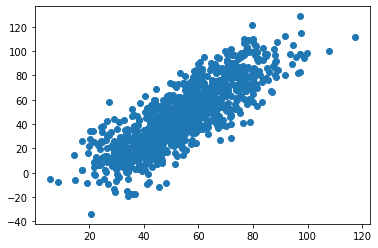

In [14]:
plt.scatter(x = "x", y = "y", data = angled_blob)
plt.show()

In [15]:
ft = FTransformStainer(1, col_idx = [1], trans_lst = ["cube"], scale = True)

In [16]:
res_ft = DirtyDF(angled_blob, seed = 214).add_stainers(ft).run_all_stainers()

In [17]:
res_ft.get_df()

,x,y
0,46.091429,-19.911534
1,46.872836,-30.889549
2,46.834888,-25.903969
3,55.128125,-25.102581
4,78.608795,-3.903927
...,...,...
995,59.130673,-1.056052
996,54.708155,-16.425205
997,65.401620,-22.161850
998,36.703860,-27.872270


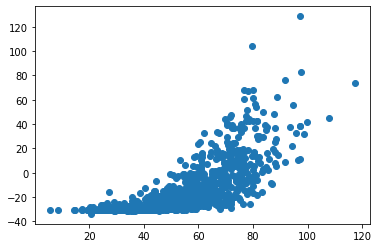

In [18]:
plt.scatter(x = "x", y = "y", data = res_ft.get_df())
plt.show()

In [19]:
res_ft.print_history()

1. Function Transform 
 Converted column 1 with transformation cube. 
 
 Time taken: 0.003939151763916016 

